In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [39]:
path = '../pure_excel/pure_excel_khin.xlsx'
df = pd.read_excel(path, sheet_name='good_base')
df.sample(3)

,name,measures,year,quarter,month,month_num,value
4077,VALSAFORCE PHARM-CENTER,Volume Treatment Days,2012,Q1,Jan,1,"53,742.26"
1802,LAZARTAN GEDEON RICHTER,Volume Treatment Days,2013,Q1,Jan,1,"25,029.69"
3844,VALSACOR KRKA,Value Trade RUB,2012,Q3,Aug,8,"10,124,813.36"


In [41]:
# Проверяем есть ли пропущенные значения

df.isna().sum()

name         0
measures     0
year         0
quarter      0
month        0
month_num    0
value        0
dtype: int64

In [47]:
# Проверяем целостность временной шкалы на пропущенные периоды

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df[['year', 'month']].drop_duplicates().sort_values(['year', 'month'])

,year,month
117,2010,Jan
118,2010,Feb
119,2010,Mar
120,2010,Apr
121,2010,May
122,2010,Jun
123,2010,Jul
124,2010,Aug
125,2010,Sep
126,2010,Oct


In [69]:
# Проверка на отрицательность. По бизнес-логике значений меньше нуля быть не должно. Так и есть.
df.value.describe()

count         4,794.00
mean      5,856,328.08
std      21,638,751.55
min               0.00
25%          27,485.22
50%         247,329.00
75%       1,182,195.00
max     346,515,008.75
Name: value, dtype: float64

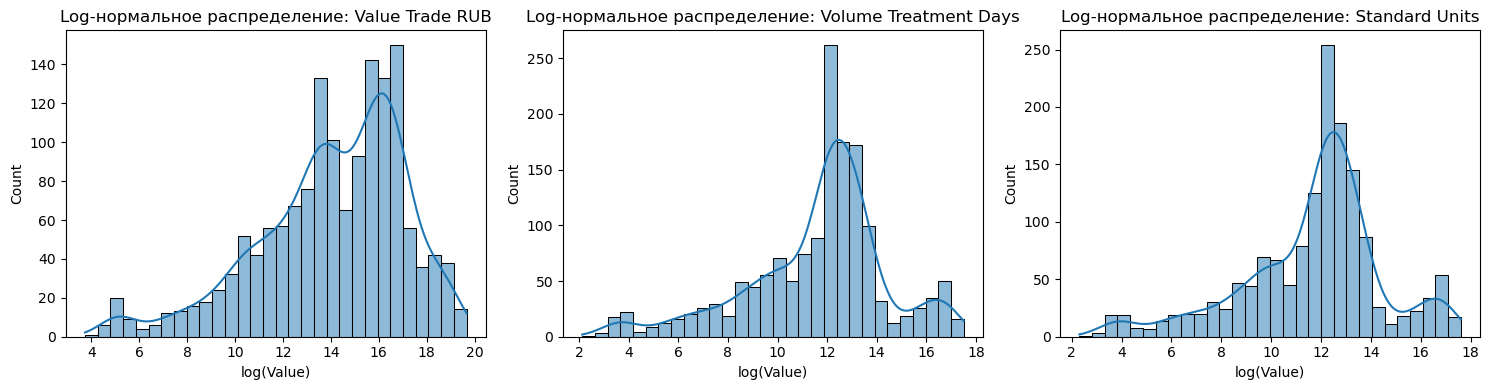

In [67]:
measures = ['Value Trade RUB', 'Volume Treatment Days', 'Standard Units']
plt.figure(figsize=(15, 4))

for i, measure in enumerate(measures, 1):
    plt.subplot(1, 3, i)
    
    df_measure = df[df['measures'] == measure]
    values = df_measure['value']
    values = values[values > 0]
    log_values = np.log(values)
    
    sns.histplot(log_values, bins=30, kde=True)
    plt.title(f'Log-нормальное распределение: {measure}')
    plt.xlabel('log(Value)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()